In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import Sequential,utils
from tensorflow.keras.layers import Flatten, Dense, Conv1D, MaxPool1D, Dropout
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

In [38]:
df_train = pd.read_csv("mitbih_train.csv", header=None)
df_test = pd.read_csv("mitbih_test.csv", header=None)

In [39]:
df= pd.concat([df_train,df_test],ignore_index=True,sort=False)

In [40]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=28)

In [42]:
import imblearn
from imblearn.over_sampling import SMOTE

In [43]:
smote=SMOTE()
X_oversampled,y_oversampled=smote.fit_resample(X_train,y_train)

In [44]:
X_train = np.array(X_train).reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = np.array(X_test).reshape(X_test.shape[0], X_test.shape[1], 1)

In [45]:
model = Sequential()

model.add(Conv1D(filters=32, kernel_size=(3,), padding='same', activation='relu', input_shape = (X_train.shape[1],1)))
model.add(Conv1D(filters=64, kernel_size=(3,), padding='same', activation='relu')) 
model.add(Conv1D(filters=128, kernel_size=(5,), padding='same', activation='relu'))    

model.add(MaxPool1D(pool_size=(3,), strides=2, padding='same'))
model.add(Dropout(0.6))

model.add(Flatten())

model.add(Dense(units = 512, activation='relu'))
model.add(Dense(units = 1024, activation='relu'))
model.add(Dense(units = 5, activation='softmax'))

model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [46]:
history = model.fit(X_train, y_train, epochs=10,validation_split=0.2,batch_size=64,verbose=1)

Epoch 1/10
958/958 ━━━━━━━━━━━━━━━━━━━━ 194s 187ms/step - accuracy: 0.9443 - loss: 0.1994 - val_accuracy: 0.9715 - val_loss: 0.1043
Epoch 2/10
958/958 ━━━━━━━━━━━━━━━━━━━━ 194s 187ms/step - accuracy: 0.9443 - loss: 0.1994 - val_accuracy: 0.9715 - val_loss: 0.1043
Epoch 2/10
958/958 ━━━━━━━━━━━━━━━━━━━━ 137s 143ms/step - accuracy: 0.9694 - loss: 0.1081 - val_accuracy: 0.9765 - val_loss: 0.0835
Epoch 3/10
958/958 ━━━━━━━━━━━━━━━━━━━━ 137s 143ms/step - accuracy: 0.9694 - loss: 0.1081 - val_accuracy: 0.9765 - val_loss: 0.0835
Epoch 3/10
958/958 ━━━━━━━━━━━━━━━━━━━━ 138s 144ms/step - accuracy: 0.9760 - loss: 0.0837 - val_accuracy: 0.9789 - val_loss: 0.0756
Epoch 4/10
958/958 ━━━━━━━━━━━━━━━━━━━━ 138s 144ms/step - accuracy: 0.9760 - loss: 0.0837 - val_accuracy: 0.9789 - val_loss: 0.0756
Epoch 4/10
958/958 ━━━━━━━━━━━━━━━━━━━━ 165s 172ms/step - accuracy: 0.9799 - loss: 0.0674 - val_accuracy: 0.9828 - val_loss: 0.0606
Epoch 5/10
958/958 ━━━━━━━━━━━━━━━━━━━━ 165s 172ms/step - accuracy: 0.9799 -

In [47]:
# Save only the CNN model with the highest validation accuracy
best_val_acc = max(history.history['val_accuracy'])
if not 'cnn_best_acc' in globals() or best_val_acc > cnn_best_acc:
    cnn_best_acc = best_val_acc
    model.save('ecg_cnn_best.h5')
    print(f"Saved new best CNN model with val_accuracy: {cnn_best_acc:.4f}")

Saved new best CNN model with val_accuracy: 0.9853


In [48]:
pred = model.predict(X_test)

1027/1027 ━━━━━━━━━━━━━━━━━━━━ 17s 16ms/step
1027/1027 ━━━━━━━━━━━━━━━━━━━━ 17s 16ms/step


In [49]:
y_pred=np.argmax(pred,axis=1)

In [50]:
from sklearn.metrics import classification_report
print("Accuracy with CNN is:", accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy with CNN is: 0.9870561003837486
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99     27096
         1.0       0.91      0.81      0.86       852
         2.0       0.97      0.97      0.97      2161
         3.0       0.91      0.79      0.85       232
         4.0       1.00      0.99      0.99      2493

    accuracy                           0.99     32834
   macro avg       0.95      0.91      0.93     32834
weighted avg       0.99      0.99      0.99     32834



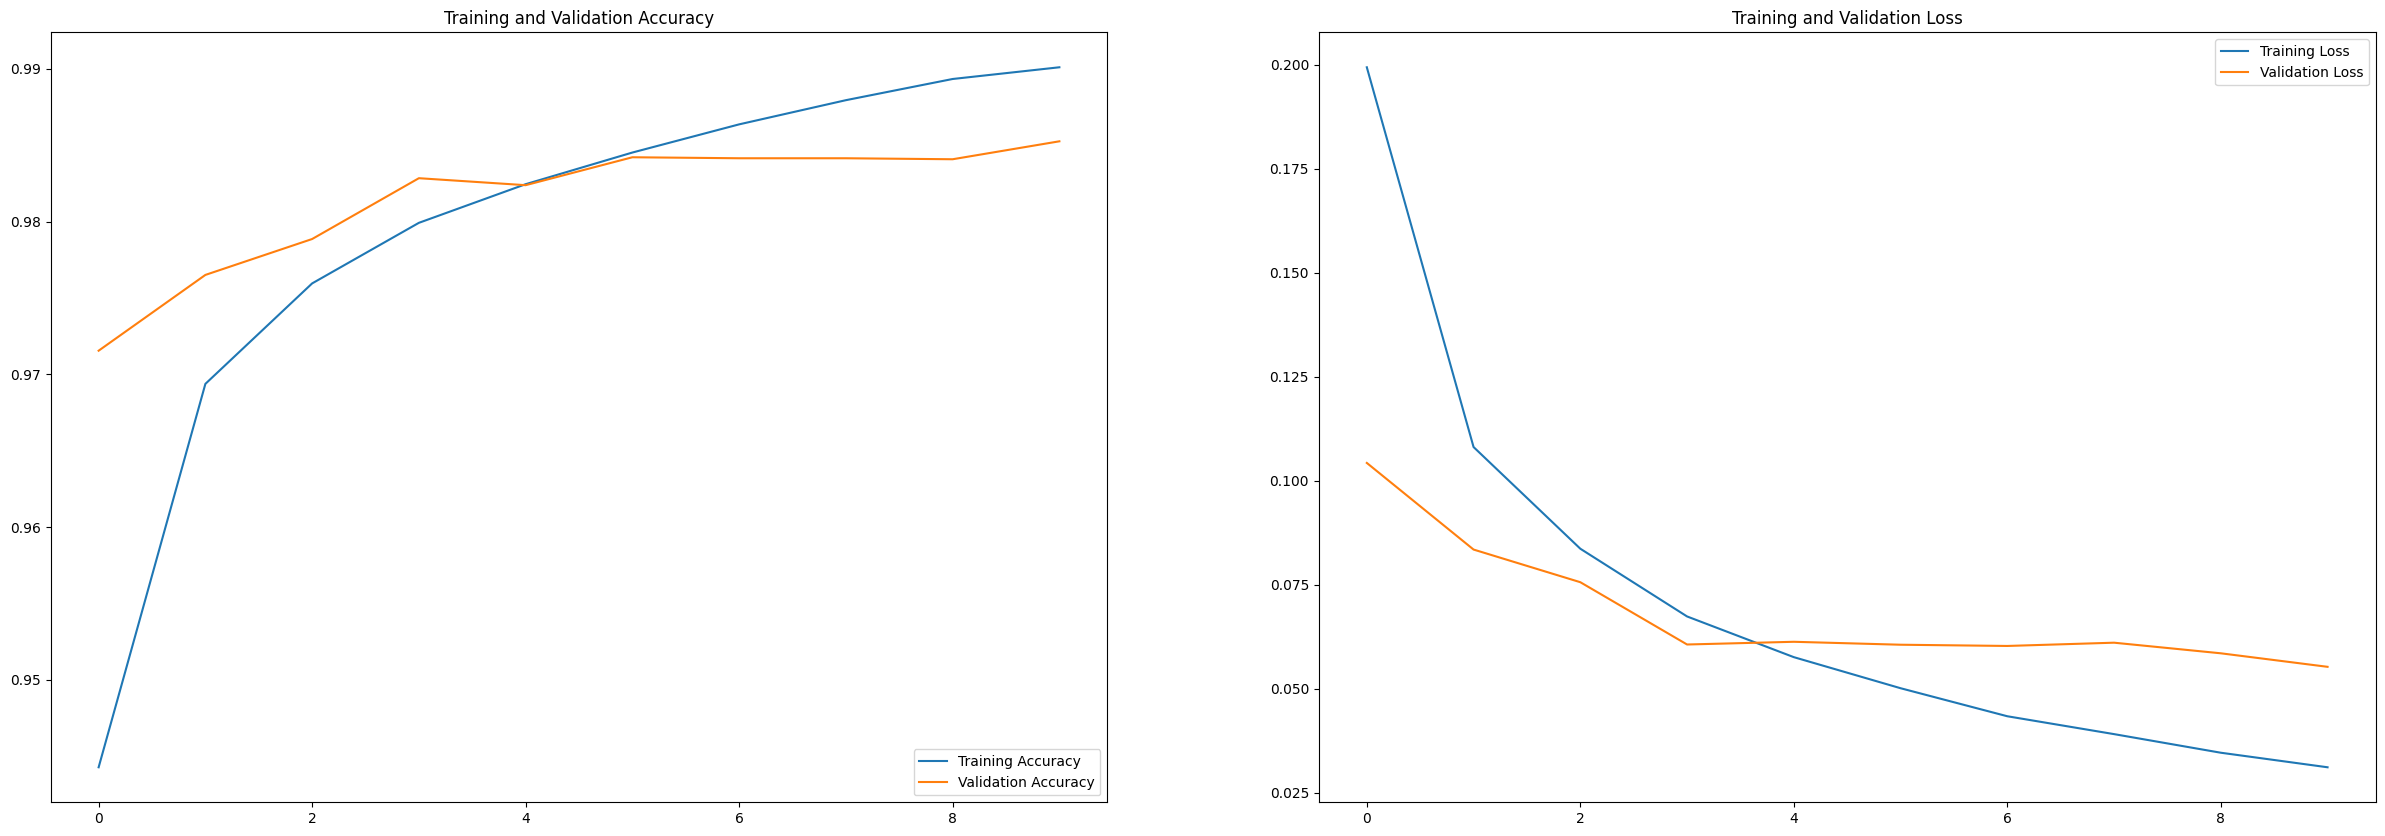

In [51]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(30, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [52]:
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

[[26980    63    36     9     8]
 [  151   690    10     0     1]
 [   55     3  2090    10     3]
 [   24     1    23   184     0]
 [   20     2     6     0  2465]]


In [53]:
import numpy as np


def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(12, 8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

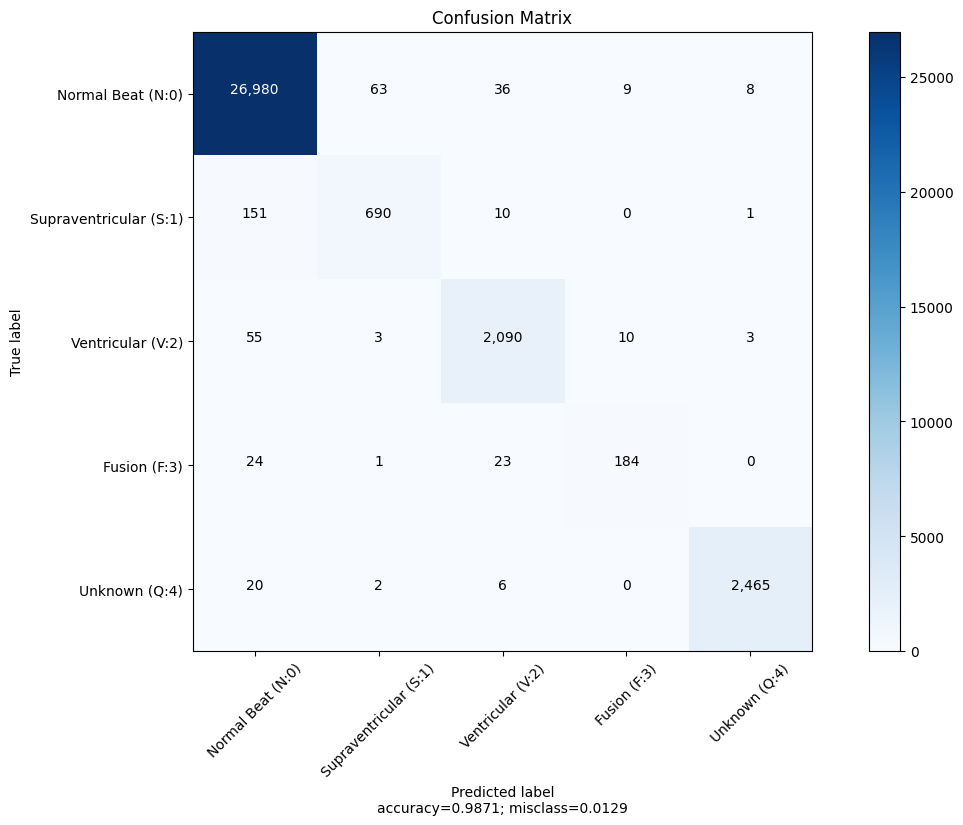

In [54]:
plot_confusion_matrix(cf_matrix,
                      normalize    = False,
                      target_names = ["Normal Beat (N:0)",
                                         "Supraventricular (S:1)",
                                         "Ventricular (V:2)",
                                         "Fusion (F:3)",
                                         "Unknown (Q:4)"],
                      title        = "Confusion Matrix")

CNN peformed better so we use this same model and turn this problem into a binary classification problem
Normal beat as 0 and rest of the beats as 1

In [55]:
df

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109441,0.928736,0.871264,0.804598,0.742529,0.650575,0.535632,0.394253,0.250575,0.140230,0.102299,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
109442,0.802691,0.692078,0.587444,0.446936,0.318386,0.189836,0.118087,0.077728,0.112108,0.152466,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
109443,1.000000,0.967359,0.620178,0.347181,0.139466,0.089021,0.103858,0.100890,0.106825,0.100890,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
109444,0.984127,0.567460,0.607143,0.583333,0.607143,0.575397,0.575397,0.488095,0.392857,0.238095,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


In [56]:
df[187].value_counts()

187
0.0    90589
4.0     8039
2.0     7236
1.0     2779
3.0      803
Name: count, dtype: int64

In [57]:
df[187]=df[187].map({4.0:1,2.0:1,3.0:1})

In [58]:
df[187].value_counts()

187
1.0    16078
Name: count, dtype: int64

In [59]:
df=df.fillna(0)

class distribution


<Axes: xlabel='187'>

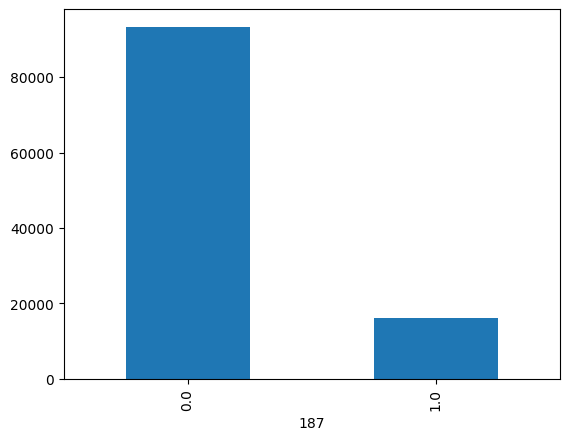

In [60]:
print('class distribution')
df[187].value_counts().plot(kind='bar')

In [61]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=28)

In [63]:
import imblearn
from imblearn.over_sampling import SMOTE

In [64]:
smote=SMOTE()
X_oversampled,y_oversampled=smote.fit_resample(X_train,y_train)

In [65]:
X_train = np.array(X_train).reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = np.array(X_test).reshape(X_test.shape[0], X_test.shape[1], 1)

In [66]:
history2 = model.fit(X_train, y_train, epochs=10,validation_split=0.2,batch_size=64,verbose=1)

Epoch 1/10
958/958 ━━━━━━━━━━━━━━━━━━━━ 97s 101ms/step - accuracy: 0.9829 - loss: 0.0562 - val_accuracy: 0.9930 - val_loss: 0.0241
Epoch 2/10
958/958 ━━━━━━━━━━━━━━━━━━━━ 97s 101ms/step - accuracy: 0.9829 - loss: 0.0562 - val_accuracy: 0.9930 - val_loss: 0.0241
Epoch 2/10
958/958 ━━━━━━━━━━━━━━━━━━━━ 164s 118ms/step - accuracy: 0.9943 - loss: 0.0165 - val_accuracy: 0.9924 - val_loss: 0.0230
Epoch 3/10
958/958 ━━━━━━━━━━━━━━━━━━━━ 164s 118ms/step - accuracy: 0.9943 - loss: 0.0165 - val_accuracy: 0.9924 - val_loss: 0.0230
Epoch 3/10
958/958 ━━━━━━━━━━━━━━━━━━━━ 136s 142ms/step - accuracy: 0.9952 - loss: 0.0151 - val_accuracy: 0.9938 - val_loss: 0.0198
Epoch 4/10
958/958 ━━━━━━━━━━━━━━━━━━━━ 136s 142ms/step - accuracy: 0.9952 - loss: 0.0151 - val_accuracy: 0.9938 - val_loss: 0.0198
Epoch 4/10
958/958 ━━━━━━━━━━━━━━━━━━━━ 136s 142ms/step - accuracy: 0.9954 - loss: 0.0145 - val_accuracy: 0.9939 - val_loss: 0.0210
Epoch 5/10
958/958 ━━━━━━━━━━━━━━━━━━━━ 136s 142ms/step - accuracy: 0.9954 - l

In [67]:
# Save only the binary CNN model with the highest validation accuracy
best_val_acc2 = max(history2.history['val_accuracy'])
if not 'cnn_bin_best_acc' in globals() or best_val_acc2 > cnn_bin_best_acc:
    cnn_bin_best_acc = best_val_acc2
    model.save('ecg_cnn_binary_best.h5')
    print(f"Saved new best binary CNN model with val_accuracy: {cnn_bin_best_acc:.4f}")

Saved new best binary CNN model with val_accuracy: 0.9944


In [68]:
pred_value=model.predict(X_test)

1027/1027 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step
1027/1027 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step


In [69]:
y_pred=np.argmax(pred_value,axis=1)

In [70]:
from sklearn.metrics import classification_report
print("Accuracy with CNN (Binary) is:", accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy with CNN (Binary) is: 0.9948833526222818
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     27948
         1.0       0.99      0.97      0.98      4886

    accuracy                           0.99     32834
   macro avg       0.99      0.99      0.99     32834
weighted avg       0.99      0.99      0.99     32834

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     27948
         1.0       0.99      0.97      0.98      4886

    accuracy                           0.99     32834
   macro avg       0.99      0.99      0.99     32834
weighted avg       0.99      0.99      0.99     32834



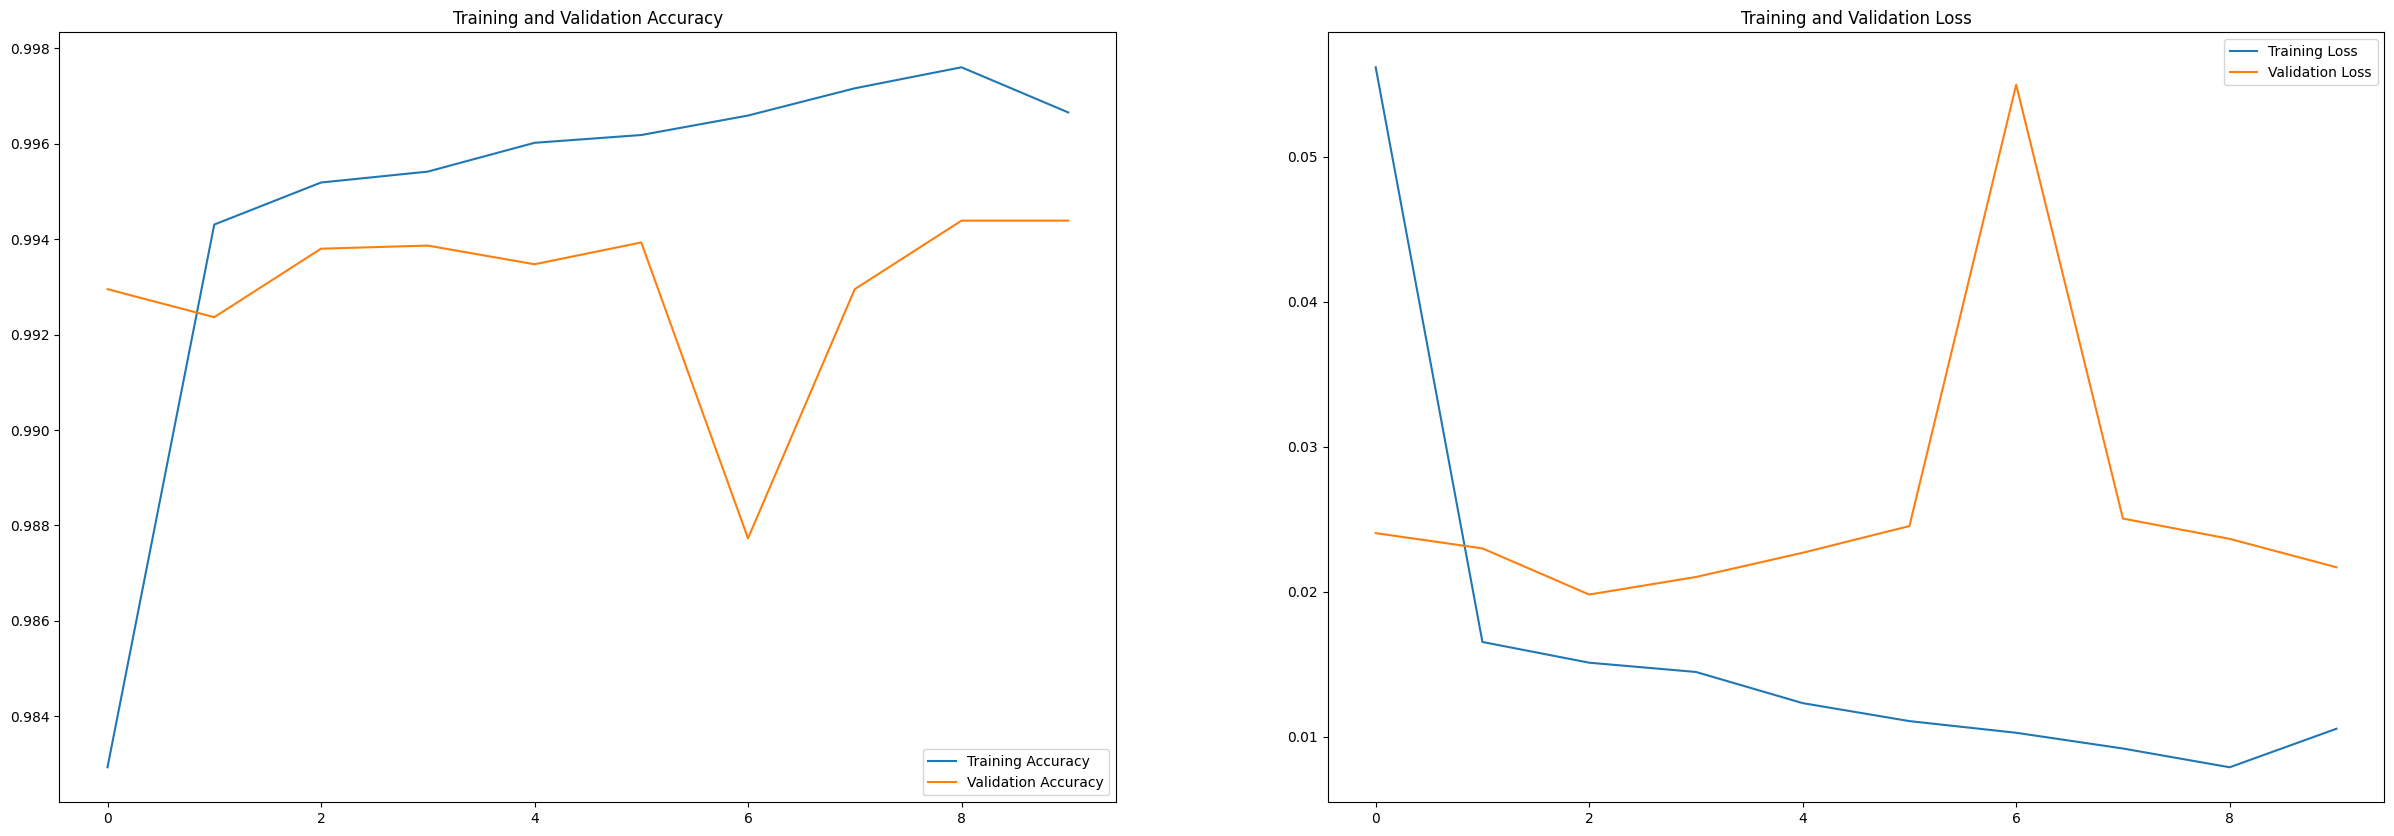

In [71]:
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']

loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(30, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [72]:
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

[[27910    38]
 [  130  4756]]


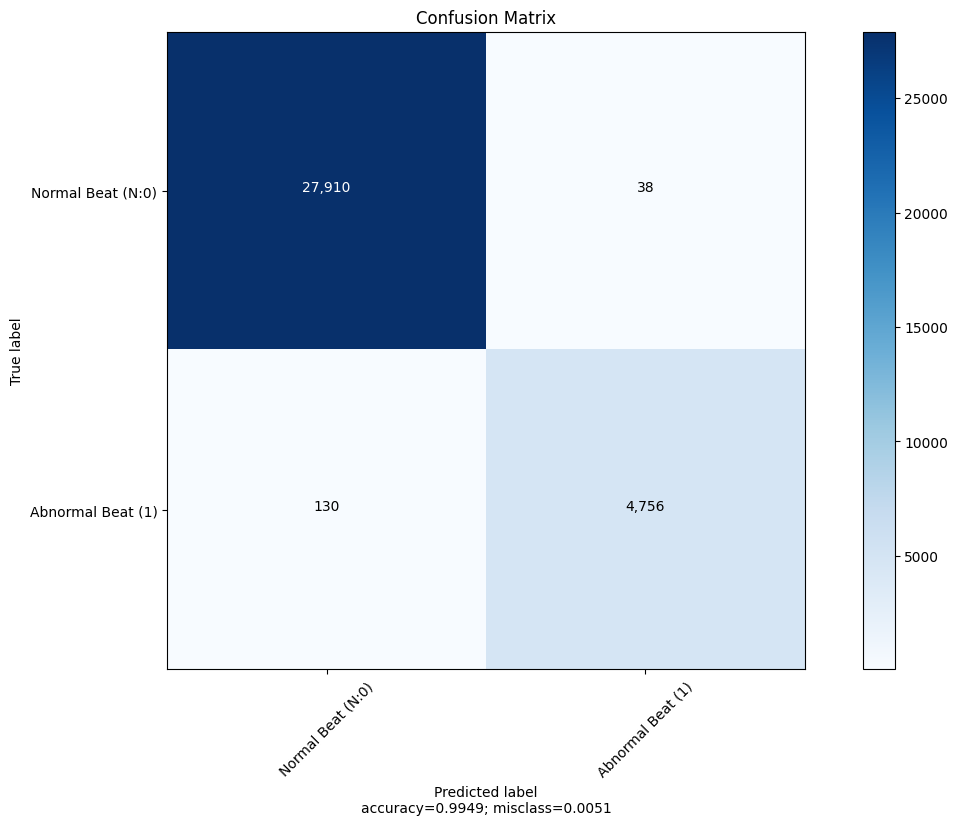

In [73]:
plot_confusion_matrix(cf_matrix,
                      normalize    = False,
                      target_names = ["Normal Beat (N:0)",
                                        "Abnormal Beat (1)"],
                      title        = "Confusion Matrix")

In [74]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [75]:
from sklearn.metrics import roc_curve,auc
fpr_keras, tpr_keras, thresholds = roc_curve(y_test.ravel(), y_pred.ravel())
auc_keras = auc(fpr_keras, tpr_keras)
auc_keras

/var/folders/2_/5kbqxbk17n307zvz3bltvf540000gn/T/ipykernel_23271/3845390698.py:2: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  fpr_keras, tpr_keras, thresholds = roc_curve(y_test.ravel(), y_pred.ravel())


0.9860168504270342

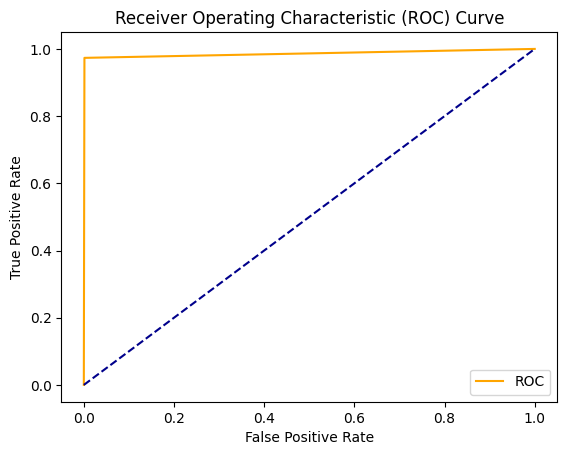

In [76]:
plot_roc_curve(fpr_keras, tpr_keras)